# DATA ANALYSIS Project - Group 7

## COMM2550 (Spring 2023)

### By Nikita Patel and Arlette Ngabonzima

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def wide_to_long(icode, df):
    idvars = df.columns[:2]

    long_df = df.drop(columns=cols_to_drop).melt(id_vars=idvars,
                                                 var_name='year',
                                                 value_name=icode)
    long_df['year']=long_df['year'].astype(int)
    
    long_df=long_df.rename(columns={
        'Country Name': 'country_name',
        'Country Code': 'country_code'},
                 )
    
    return long_df

### STEP 1: Uploading our data and cleaning our data frames 

* First Data set imported in the Poverty data set from 2000  - 2022
* Second Data set imported is Net official development assistance and official aid received from 1960 to 2021
* Third Data set imported is the annual GDP growth from 1961 to 2021

#### Uploading GDP data

In [3]:
GDP_df = pd.read_csv('../data/GDP_DATA.csv', skiprows=4)
GDP_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,4.229408,4.039082,2.895728,2.485952,2.639537,2.610797,2.038299,-3.042653,4.402447,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.835056,3.772898,7.282985,5.392705,4.056588,...,6.108758,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382,3.965399,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.600000,1.100000,NaN


<h5 style="color:green">Editing this dataframe to be more readable by converting it from wide to long</h5>
* We want to end up with a table with attribute: country_name, country_code, year, NY.GDP.MKTP.KD.ZG 

In [4]:
GDP_df.columns[:2]
GDP_df.columns[-5:]
id_vars = GDP_df.columns[:2]
val_name = GDP_df['Indicator Code'].unique()[0]
cols_to_drop = ['Unnamed: 66',
                'Indicator Name',
                'Indicator Code']
GDP_long_df=GDP_df.drop(columns=cols_to_drop).melt(id_vars=id_vars,
                                        var_name='year',
                                        value_name=val_name)

GDP_long_df['year']=GDP_long_df['year'].astype('int')

GDP_long_df=GDP_long_df.rename(columns={
        'Country Name': 'country_name',
        'Country Code': 'country_code'},
                 )

GDP_long_df.head(10)

,country_name,country_code,year,NY.GDP.MKTP.KD.ZG
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN
5,Albania,ALB,1960,NaN
6,Andorra,AND,1960,NaN
7,Arab World,ARB,1960,NaN
8,United Arab Emirates,ARE,1960,NaN
9,Argentina,ARG,1960,NaN


In [5]:
GDP_long_df.shape

(16492, 4)


#### Uploading Foreign Aid Data 

In [6]:
FA_df = pd.read_csv('../data/Foreign_Aid_Data.csv', skiprows=4)
FA_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.920757e+10,2.590026e+10,2.549711e+10,2.506915e+10,2.788161e+10,2.752549e+10,3.020291e+10,NaN,NaN,NaN
2,Afghanistan,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,1.718000e+07,3.467000e+07,1.693000e+07,3.667000e+07,4.617000e+07,5.393000e+07,...,5.152540e+09,4.942970e+09,4.274230e+09,4.069420e+09,3.811740e+09,3.792490e+09,4.137000e+09,4.208490e+09,4.656340e+09,NaN
3,Africa Western and Central,AFW,Net official development assistance and offici...,DT.ODA.ALLD.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.410561e+10,1.472914e+10,1.465270e+10,1.383424e+10,1.591747e+10,1.657392e+10,1.843102e+10,NaN,NaN,NaN
4,Angola,AGO,Net official development assistance and offici...,DT.ODA.ALLD.CD,-5.000000e+04,2.355000e+07,NaN,3.000000e+04,NaN,1.110000e+06,...,2.855400e+08,2.353900e+08,3.800600e+08,2.065300e+08,2.232200e+08,1.627200e+08,2.104000e+07,1.110700e+08,2.317300e+08,NaN


<h5 style="color:green">Editing this dataframe to be more readable by converting it from wide to long</h5>

In [7]:
FA_long_df = wide_to_long('DT.ODA.ALLD.CD', FA_df)
FA_long_df.head()

,country_name,country_code,year,DT.ODA.ALLD.CD
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,1.718000e+07
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,-5.000000e+04


In [8]:
FA_long_df.shape

(16492, 4)

#### Uploading the poverty dataframe

In [9]:
POV_df = pd.read_csv('../data/poverty_Data.csv', skiprows=4)
POV_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,"Survey mean consumption or income per capita, ...",SI.SPR.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Annualized average growth rate in per capita r...,SI.SPR.PC40.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Survey mean consumption or income per capita, ...",SI.SPR.PC40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,Poverty gap at $6.85 a day (2017 PPP) (%),SI.POV.UMIC.GP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,Zimbabwe,ZWE,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,51.1,NaN,NaN,NaN,NaN,NaN
7710,Zimbabwe,ZWE,Income share held by fourth 20%,SI.DST.04TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.6,NaN,NaN,NaN,NaN,NaN
7711,Zimbabwe,ZWE,Income share held by third 20%,SI.DST.03RD.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,NaN,NaN
7712,Zimbabwe,ZWE,Income share held by second 20%,SI.DST.02ND.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN


In [10]:
POV_df.shape

(7714, 67)

<h5 style="color:green">Editing this dataframe to be more readable by converting it from wide to long</h5>

In [11]:
chunks=[]
for icode, idf in POV_df.groupby('Indicator Code'):
    chunks.append(wide_to_long(icode,idf).set_index(['country_code',
                                                     'country_name',
                                                     'year']))
    
POV_long_df = pd.concat(chunks, axis=1).reset_index()

In [12]:

POV_long_df.shape

(16492, 32)

In [13]:
POV_long_df

,country_code,country_name,year,EN.POP.SLUM.UR.ZS,SI.DST.02ND.20,SI.DST.03RD.20,SI.DST.04TH.20,SI.DST.05TH.20,SI.DST.10TH.10,SI.DST.50MD,...,SI.POV.MDIM.IT,SI.POV.MDIM.MA,SI.POV.MDIM.XQ,SI.POV.NAHC,SI.POV.UMIC,SI.POV.UMIC.GP,SI.SPR.PC40,SI.SPR.PC40.ZG,SI.SPR.PCAP,SI.SPR.PCAP.ZG
0,ABW,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFW,Africa Western and Central,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,XKX,Kosovo,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16488,YEM,"Yemen, Rep.",2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16489,ZAF,South Africa,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16490,ZMB,Zambia,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Uploading the regions data

* The regions data is going to allow us to know which continent, region, and subregion each country belongs to for easier regional analysis

In [14]:
regions_df = pd.read_csv('../data/countryContinent.csv', encoding='ISO-8859-1')
regions_df

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


### STEP 2: Merging to the dataframes

#### Uploading the long versions of the dataframes in the data folder

In [15]:
GDP_long_df.to_csv('../data/GDP_long.csv',index=False)

In [16]:
FA_long_df.to_csv('../data/FA_long.csv', index=False)

In [17]:
POV_long_df.to_csv('../data/POV_long.csv', index=False)

In [18]:
regions_df.to_csv('../data/regions_df.csv', index=False)

##### Combining the three dataframes in one combined dataframe called combined_df

In [19]:
combined_df = pd.merge(
                        pd.merge(GDP_long_df,
                                 FA_long_df),
                        POV_long_df)

In [20]:
combined_df.shape

(16492, 34)

In [21]:
combined_df.to_csv('../data/combined_long_data.csv', index=False)

* Uploading the long version of the combined dataframe in the data folder

In [22]:
combined_df

,country_name,country_code,year,NY.GDP.MKTP.KD.ZG,DT.ODA.ALLD.CD,EN.POP.SLUM.UR.ZS,SI.DST.02ND.20,SI.DST.03RD.20,SI.DST.04TH.20,SI.DST.05TH.20,...,SI.POV.MDIM.IT,SI.POV.MDIM.MA,SI.POV.MDIM.XQ,SI.POV.NAHC,SI.POV.UMIC,SI.POV.UMIC.GP,SI.SPR.PC40,SI.SPR.PC40.ZG,SI.SPR.PCAP,SI.SPR.PCAP.ZG
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,NaN,1.718000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,NaN,-5.000000e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,Kosovo,XKX,2021,10.745612,4.524500e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16488,"Yemen, Rep.",YEM,2021,NaN,3.867980e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16489,South Africa,ZAF,2021,4.913097,1.039620e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16490,Zambia,ZMB,2021,4.598734,1.070760e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Merge the combined_df with the regions dataframe on the 'country' and 'country_name' columns

In [23]:
merged_df = pd.merge(combined_df, regions_df, left_on='country_name', right_on='country')
merged_df.drop('country', axis=1, inplace=True)
merged_df

,country_name,country_code_x,year,NY.GDP.MKTP.KD.ZG,DT.ODA.ALLD.CD,EN.POP.SLUM.UR.ZS,SI.DST.02ND.20,SI.DST.03RD.20,SI.DST.04TH.20,SI.DST.05TH.20,...,SI.SPR.PCAP,SI.SPR.PCAP.ZG,code_2,code_3,country_code_y,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0
1,Aruba,ABW,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0
2,Aruba,ABW,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0
3,Aruba,ABW,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0
4,Aruba,ABW,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,Zimbabwe,ZWE,2017,4.080264,7.258400e+08,NaN,9.1,13.2,20.6,51.1,...,4.41,-3.5,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11218,Zimbabwe,ZWE,2018,5.009867,7.945600e+08,22.16356,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11219,Zimbabwe,ZWE,2019,-6.332446,8.440900e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11220,Zimbabwe,ZWE,2020,-7.816951,9.846000e+08,21.56821,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0


#### Metadata

* Create a data frame that contains indicator names and codes for use in understanding column names

In [24]:
metadata_df = pd.concat(
                    [
                        GDP_df[['Indicator Code','Indicator Name']].drop_duplicates(),
                        FA_df[['Indicator Code','Indicator Name']].drop_duplicates(),
                        POV_df[['Indicator Code','Indicator Name']].drop_duplicates() ],
    
                    ignore_index=True)

In [25]:
metadata_df.to_csv('../data/metadata.csv', index=False)

### Initial Analysis of Data 

To analyse our data we are going to start by asking questions that lead up to our hypothesis
* The initial analysis questions will give us a broad idea of the data we are working with before we start narrowing down our questions towards our analysis

<h5 style="color:green"> To start let us rename the most important columns in our table with meaningful names </h5>

* NY.GDP.MKTP.KD.ZG to gdp
* DT.ODA.ALLD.CD to monetary_aid
* SI.POV.DDAY to poverty count 

In [26]:
merged_df = merged_df.rename(columns={'NY.GDP.MKTP.KD.ZG': 'gdp'})
merged_df = merged_df.rename(columns={'DT.ODA.ALLD.CD': 'monetary_aid'})
merged_df = merged_df.rename(columns={'SI.POV.DDAY': 'poverty_count'})

In [27]:
gdp_growth_by_region = merged_df.groupby('sub_region')['gdp'].mean()
foreign_aid_by_subregion = merged_df.groupby('sub_region')['monetary_aid'].sum()
percentagePeopleInPoverty_subregion = merged_df.groupby('sub_region')['poverty_count'].mean()

<h5 style="color:red"> Question 1:  </h5>

How do each of the attributes (GDP, Foreign aid, and poverty_count) differ by region?

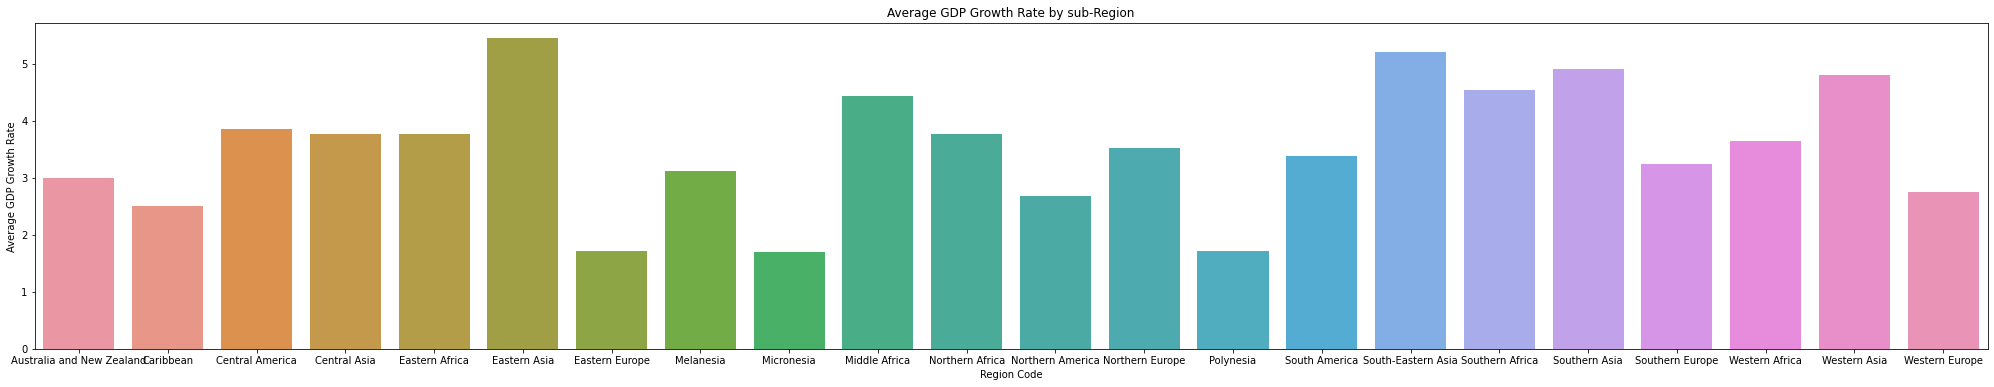

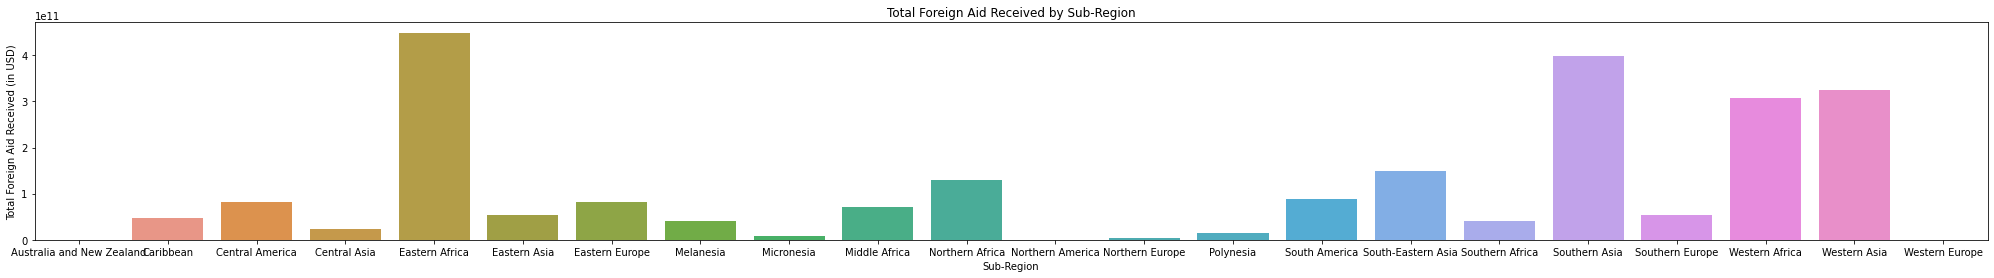

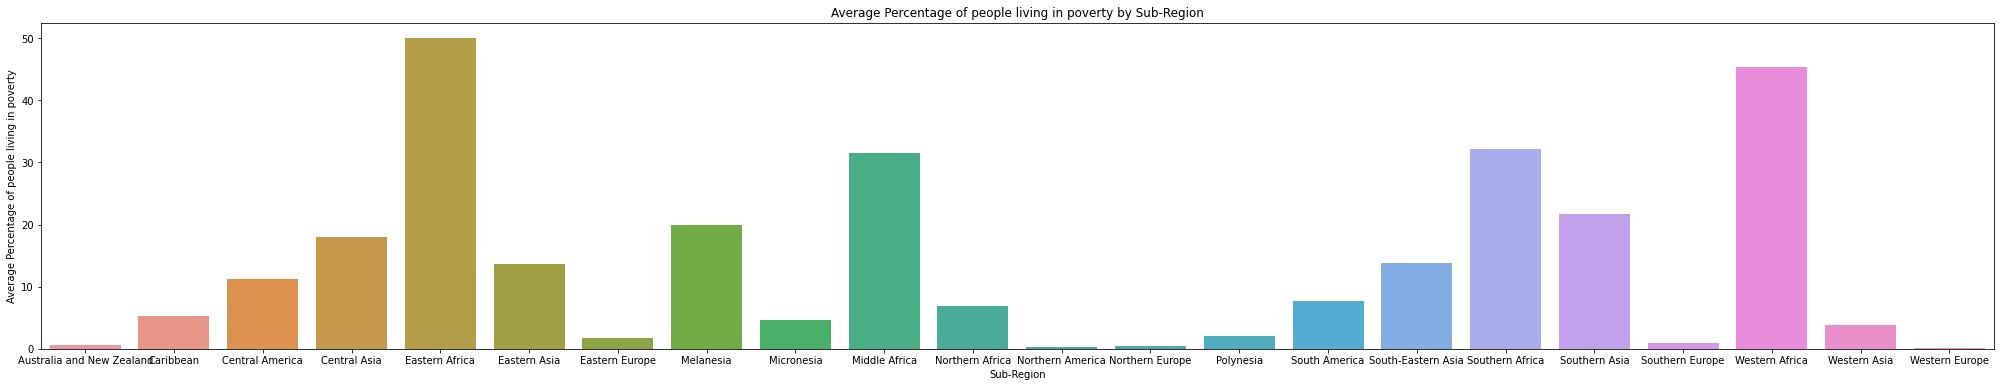

In [28]:
# GDP growth by subregion
plt.figure(figsize=(35, 6))
sns.barplot(x=gdp_growth_by_region.index, y=gdp_growth_by_region.values)
plt.xlabel('Region Code')
plt.ylabel('Average GDP Growth Rate')
plt.title('Average GDP Growth Rate by sub-Region')
plt.show()

# Foreign aid by subregion
plt.figure(figsize=(35, 4))
sns.barplot(x=foreign_aid_by_subregion.index, y=foreign_aid_by_subregion.values)
plt.xlabel('Sub-Region')
plt.ylabel('Total Foreign Aid Received (in USD)')
plt.title('Total Foreign Aid Received by Sub-Region')
plt.show()

# Urban slum by subregion
plt.figure(figsize=(35, 6))
sns.barplot(x=percentagePeopleInPoverty_subregion.index, y=percentagePeopleInPoverty_subregion.values)
plt.xlabel('Sub-Region')
plt.ylabel('Average Percentage of people living in poverty')
plt.title('Average Percentage of people living in poverty by Sub-Region')
plt.show()


<h5 style="color:green"> Answer </h5>

It seems as though regions with higher poverty rates receive higher foreign aid. It also seems as though the GDP in those regions the GDP is equally high which could reflect that they are actively attempting to grow their economy. Such regions are like Eastern Africa or Southern Asia.

<h5 style="color:red"> Question 2 </h5>

How has the GDP and foreign aid received differ by continent?

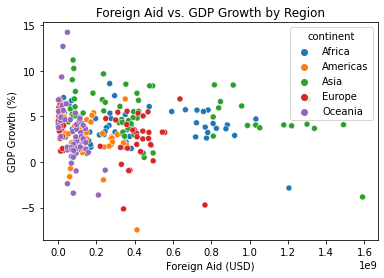

In [29]:
# Group data by region and year
grouped_df = merged_df.groupby(["continent", "year"]).mean().reset_index()

# Create scatterplot of foreign aid and GDP growth by region
sns.scatterplot(x="monetary_aid", y="gdp",hue="continent", data=grouped_df)
plt.xlabel("Foreign Aid (USD)")
plt.ylabel("GDP Growth (%)")
plt.title("Foreign Aid vs. GDP Growth by Region")

plt.show()

* **NOTE** hard to interpret all these points without guidance - what they really are is a time series scatter (Jones covered these in the Learning to See book)

* It is an unusual plot but it would look like this

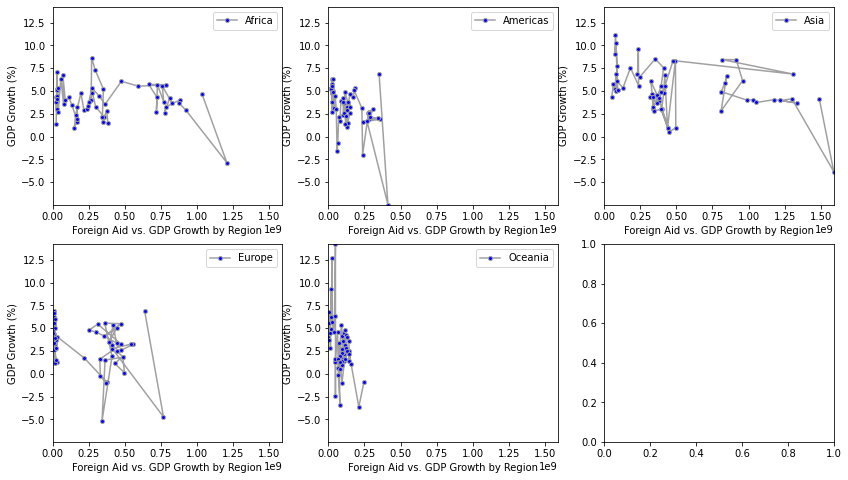

In [70]:
xmax=grouped_df['monetary_aid'].max()
ymin=grouped_df['gdp'].min()
ymax=grouped_df['gdp'].max()

fig, ax = plt.subplots(2,3, figsize=(14,8))
for idx, (cont, gdf) in enumerate(grouped_df.groupby('continent')):
    row = idx // 3
    col = idx % 3
    gdf.plot(x='monetary_aid', 
             y='gdp', style='-o', 
             color='#a0a0a0',
             mfc='blue',
             markersize=4,
             ax=ax[row][col],
             label=cont
                        )
    ax[row][col].set_xlabel('Foreign Aid vs. GDP Growth by Region')
    ax[row][col].set_ylabel('GDP Growth (%)')
    ax[row][col].set_xlim(0,xmax)
    ax[row][col].set_ylim(ymin,ymax)
    
    

* From this the lines link continuous years and the position of the point is the GDP and Foreign Aid values at this year.
* But you can see with Oceania not much variation in the aid but growth in GDP
* Whereas with Asia you see an increase over time in aid but a downward trend in GDP growth

<h5 style="color:green"> Answer </h5>

It seems as though Oceania has the least foreign aid and has generally maintained moderate  GDP growth. It seems as though Asia's and Africa's foreign aid and GDP growth is distributed which tells us that there are regions in Asia receiving high foreign aid and those receiving low foreign aid, in terms of GDP, it seems as though in Asia the GDP has stayed generally high. In America and Europe, it seems as though the foreign aid generally received is lower than average, but the GDP growth on the continent is distributed meaning that some regions are growing faster than others on these continents.  

<h5 style="color:red"> Question 3 </h5>

How has the GDP and poverty rate differ by continent?

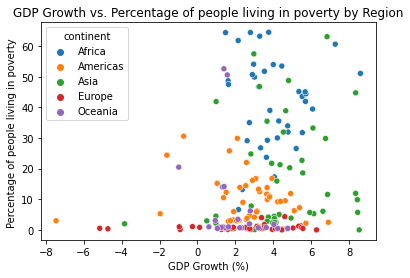

In [89]:
sns.scatterplot(x="gdp", y= "poverty_count", hue="continent", data=grouped_df)
plt.xlabel("GDP Growth (%)")
plt.ylabel("Percentage of people living in poverty ")
plt.title("GDP Growth vs. Percentage of people living in poverty by Region")

plt.show()

<h5 style="color:green"> Answer </h5>

It seems as though Oceania and Europe have the lowest poverty rates while the poverty rates in Africa and Asia are distributed. In America, the poverty rates are not low but they are generally below average. There are a few countries in Europe, America, and Asia that have a negative GDP.

<h5 style="color:red"> Question 4 </h5>

How has the poverty rate and foreign differ by continent?

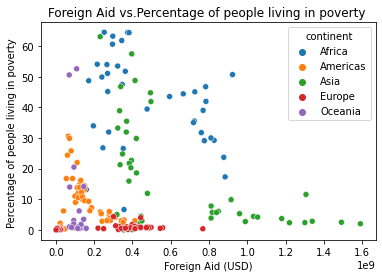

In [90]:
# Create scatterplot of foreign aid and Poverty Head Count by region
sns.scatterplot(x="monetary_aid", y="poverty_count", hue="continent", data=grouped_df)
plt.xlabel("Foreign Aid (USD)")
plt.ylabel("Percentage of people living in poverty ")
plt.title("Foreign Aid vs.Percentage of people living in poverty ")

plt.show()

<h5 style="color: green"> Answer </h5>

Finally, the plot above shows that generally, Oceania, Europe, and Americas receive the least foreign aid which might be very correlated to the fact that based on this data they have lower percentages off people living in poverty. Africa and Asia seem to have distributed poverty rates and foreign aid.

<h5 style="color:red"> Question 5 </h5>

How did the total world foreign aid change over time?

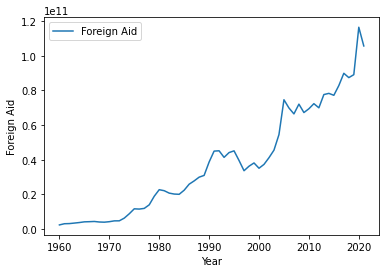

In [94]:
# Create linechart of foreign aid over time
fig = plt.figure()
merged_df.groupby('year')['monetary_aid'].sum().plot(label='Foreign Aid')
plt.legend()
plt.ylabel('Foreign Aid')
plt.xlabel('Year')
plt.show()

<h5 style="color:green"> Answer </h5>

On a global level it seems as though generally the foreign aid has been consistently increasing since the 1960s to 2020. 

<h5 style="color:red"> Question 6 </h5>

How did the average gdp change over time

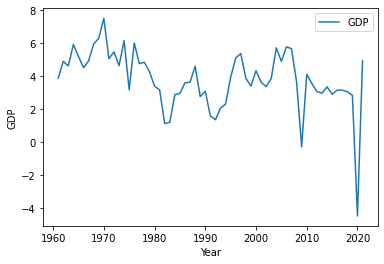

In [95]:
# Create linechart of gdp average over time
fig = plt.figure()
merged_df.groupby('year')['gdp'].mean().plot(label='GDP')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

<h5 style="color:green"> Answer </h5>

It seems as though on a global level the GDP has been consistently decreasing and increasing at the same rate besides when it dropped so much in 2008 and 2009 due to recession and again in 2020 due to the COVID-19 Pandemic. 

<h5 style="color:red"> Question 7 </h5>

How did the average percentage of people living in poverty change over time globally

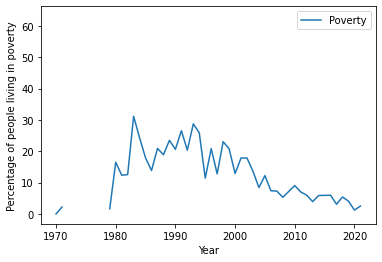

In [98]:
# Create linechart of poverty head count average over time
fig = plt.figure()
merged_df.groupby('year')['poverty_count'].mean().plot(label='Poverty')
plt.legend()
plt.ylabel('Percentage of people living in poverty')
plt.xlabel('Year')
plt.show()

<h5 style="color:green"> Answer </h5>

It seems as though starting from 2000  to 2020, the global poverty rates have generally been decreasing.

### Focused analysis

Based on the patterns observed in the analysis above we are going to start asking more narrowed questions

To start we are going to filter our dataframe only to include the years from 2000 - 2020. 
* The reason for this is because data records for gdp, foreign aid, and poverty rates start and end in different years and therefore it is better to consider an intersection period between the three for easier analysis. 
* Furthermore, looking at a shorter period of time will make it easier for us to have an understanding of the context in that time period. 

In [72]:
#Limit data from 2000-2019
Too_Old_filter = merged_df['year']>=2000
Too_New_filter = merged_df['year']<=2019
completed_df = merged_df[Too_Old_filter & Too_New_filter]

In [73]:
#distinct sub-regions & prevalence (how many times a continent appears [country & year repear])
completed_df['sub_region'].value_counts()

Eastern Africa               340
Caribbean                    300
Western Asia                 300
Southern Europe              280
Western Africa               280
Northern Europe              220
South America                200
South-Eastern Asia           180
Western Europe               180
Southern Asia                160
Central America              160
Eastern Europe               140
Middle Africa                140
Micronesia                   120
Polynesia                    100
Northern Africa              100
Melanesia                    100
Southern Africa               80
Central Asia                  80
Northern America              60
Eastern Asia                  60
Australia and New Zealand     40
Name: sub_region, dtype: int64

Next, we are going to create smaller dataframes with information for each sub_region

In [74]:
Eastern_Africa_filter = completed_df['sub_region']== 'Eastern Africa'            
Caribbean_filter= completed_df['sub_region']== 'Caribbean'                   
Western_Asia_filter= completed_df['sub_region']== 'Western Asia'                 
Southern_Europe_filter = completed_df['sub_region']== 'Southern Europe'               
Western_Africa_filter = completed_df['sub_region']== 'Western Africa'              
Northern_Africa_filter= completed_df['sub_region']== 'Northern Europe'                    
South_America_filter = completed_df['sub_region']== 'South America'                 
South_Eastern_Asia_filter = completed_df['sub_region']== 'South-Eastern Asia'           
Western_Europe_filter = completed_df['sub_region']== 'Western Europe'                
Southern_Asia_filter = completed_df['sub_region']== 'Southern Asia'                
Central_America_filter= completed_df['sub_region']== 'Central America'              
Eastern_Europe_filter= completed_df['sub_region']== 'Eastern Europe'                 
Middle_Africa_filter= completed_df['sub_region']== 'Middle Africa'               
Micronesia_filter= completed_df['sub_region']== 'Micronesia'                     
Polynesia_filter= completed_df['sub_region']== 'Polynesia'                   
Northern_Africa_filter= completed_df['sub_region']== 'Northern Africa'           
Melanesia_filter= completed_df['sub_region']== 'Melanesia'                      
Southern_Africa_filter= completed_df['sub_region'] == 'Southern Africa'               
Central_Asia_filter= completed_df['sub_region']== 'Central Asia'                  
Northern_America_filter= completed_df['sub_region']== 'Northern America'              
Eastern_Asia_filter= completed_df['sub_region']== 'Eastern Asia'                  
Australia_and_New_Zealand_filter= completed_df['sub_region']== 'Australia and New Zealand'

In [75]:
Eastern_Africa_df = completed_df[Eastern_Africa_filter]        
Caribbean_df= completed_df[Caribbean_filter]             
Western_Asia_df= completed_df[Western_Asia_filter]             
Southern_Europe_df = completed_df[Southern_Europe_filter]             
Western_Africa_df = completed_df[Western_Africa_filter]            
Northern_Africa_df= completed_df[Northern_Africa_filter]             
South_America_df = completed_df[South_America_filter]             
South_Eastern_Asia_df = completed_df[South_Eastern_Asia_filter]          
Western_Europe_df = completed_df[Western_Europe_filter]              
Southern_Asia_df = completed_df[Southern_Asia_filter]           
Central_America_df= completed_df[Central_America_filter]          
Eastern_Europe_df= completed_df[Eastern_Europe_filter]               
Middle_Africa_df= completed_df[Middle_Africa_filter]            
Micronesia_df= completed_df[Micronesia_filter]                     
Polynesia_df= completed_df[Polynesia_filter]                 
Northern_Africa_df= completed_df[Northern_Africa_filter]           
Melanesia_df= completed_df[Melanesia_filter]                    
Southern_Africa_df= completed_df[Southern_Africa_filter]            
Central_Asia_df= completed_df[Central_Asia_filter]               
Northern_America_df= completed_df[Northern_America_filter]             
Eastern_Asia_df= completed_df[Eastern_Asia_filter]                
Australia_and_New_Zealand_df= completed_df[Australia_and_New_Zealand_filter]

In [76]:
Eastern_Africa_df

,country_name,country_code_x,year,gdp,monetary_aid,EN.POP.SLUM.UR.ZS,SI.DST.02ND.20,SI.DST.03RD.20,SI.DST.04TH.20,SI.DST.05TH.20,...,SI.SPR.PCAP,SI.SPR.PCAP.ZG,code_2,code_3,country_code_y,iso_3166_2,continent,sub_region,region_code,sub_region_code
846,Burundi,BDI,2000,-0.856864,9.331000e+07,79.70000,NaN,NaN,NaN,NaN,...,NaN,NaN,BI,BDI,108,ISO 3166-2:BI,Africa,Eastern Africa,2.0,14.0
847,Burundi,BDI,2001,2.055807,1.392500e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,BI,BDI,108,ISO 3166-2:BI,Africa,Eastern Africa,2.0,14.0
848,Burundi,BDI,2002,4.446519,1.719100e+08,79.70000,NaN,NaN,NaN,NaN,...,NaN,NaN,BI,BDI,108,ISO 3166-2:BI,Africa,Eastern Africa,2.0,14.0
849,Burundi,BDI,2003,-1.223728,2.276000e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,BI,BDI,108,ISO 3166-2:BI,Africa,Eastern Africa,2.0,14.0
850,Burundi,BDI,2004,4.833658,3.588200e+08,77.04306,NaN,NaN,NaN,NaN,...,NaN,NaN,BI,BDI,108,ISO 3166-2:BI,Africa,Eastern Africa,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,Zimbabwe,ZWE,2015,2.023650,7.882900e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11216,Zimbabwe,ZWE,2016,0.900955,6.542500e+08,22.75892,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11217,Zimbabwe,ZWE,2017,4.080264,7.258400e+08,NaN,9.1,13.2,20.6,51.1,...,4.41,-3.5,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0
11218,Zimbabwe,ZWE,2018,5.009867,7.945600e+08,22.16356,NaN,NaN,NaN,NaN,...,NaN,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0


<h5 style="color:red"> Question 8 </h5>

How does the average regional foreign aid change over time?

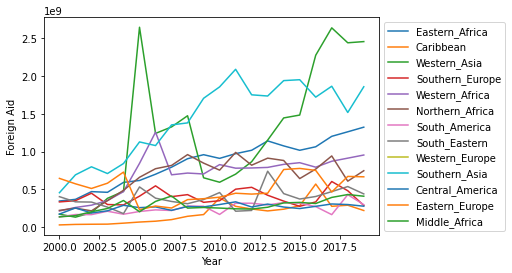

In [77]:
fig = plt.figure()
Eastern_Africa_df.groupby('year')['monetary_aid'].mean().plot(label='Eastern_Africa')     
Caribbean_df.groupby('year')['monetary_aid'].mean().plot(label='Caribbean')             
Western_Asia_df.groupby('year')['monetary_aid'].mean().plot(label='Western_Asia')                    
Southern_Europe_df.groupby('year')['monetary_aid'].mean().plot(label='Southern_Europe')                    
Western_Africa_df.groupby('year')['monetary_aid'].mean().plot(label='Western_Africa')                
Northern_Africa_df.groupby('year')['monetary_aid'].mean().plot(label='Northern_Africa')                  
South_America_df.groupby('year')['monetary_aid'].mean().plot(label='South_America')                  
South_Eastern_Asia_df.groupby('year')['monetary_aid'].mean().plot(label='South_Eastern')           
Western_Europe_df.groupby('year')['monetary_aid'].mean().plot(label='Western_Europe')                   
Southern_Asia_df.groupby('year')['monetary_aid'].mean().plot(label='Southern_Asia')               
Central_America_df.groupby('year')['monetary_aid'].mean().plot(label='Central_America')          
Eastern_Europe_df.groupby('year')['monetary_aid'].mean().plot(label='Eastern_Europe')             
Middle_Africa_df.groupby('year')['monetary_aid'].mean().plot(label='Middle_Africa')    

                 
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Foreign Aid')
plt.xlabel('Year')
plt.show()


<h5 style="color:green"> Answer </h5>

It seems as though Western Asia received the highest aid in 2004 which could be correlated to the The Indian Ocean tsunami of 2004 or the war in Ira. On the other hand, Southern Asia also received a high foreign aid in the 2011s due to the  2011 monsoon season flood. In other regions it seems as though foreign aid has been generally increasing but not in an alarming manner.

<h5 style="color:red"> Question 9 </h5>

How does the average GDP change over time by region?

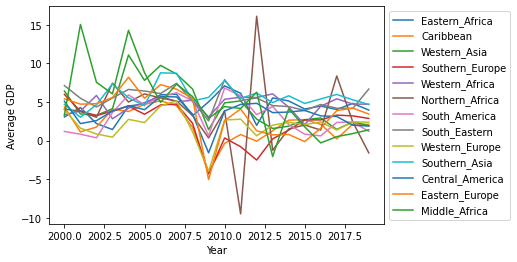

In [81]:
fig = plt.figure()
Eastern_Africa_df.groupby('year')['gdp'].mean().plot(label='Eastern_Africa')     
Caribbean_df.groupby('year')['gdp'].mean().plot(label='Caribbean')             
Western_Asia_df.groupby('year')['gdp'].mean().plot(label='Western_Asia')                    
Southern_Europe_df.groupby('year')['gdp'].mean().plot(label='Southern_Europe')                    
Western_Africa_df.groupby('year')['gdp'].mean().plot(label='Western_Africa')                
Northern_Africa_df.groupby('year')['gdp'].mean().plot(label='Northern_Africa')                  
South_America_df.groupby('year')['gdp'].mean().plot(label='South_America')                  
South_Eastern_Asia_df.groupby('year')['gdp'].mean().plot(label='South_Eastern')           
Western_Europe_df.groupby('year')['gdp'].mean().plot(label='Western_Europe')                   
Southern_Asia_df.groupby('year')['gdp'].mean().plot(label='Southern_Asia')               
Central_America_df.groupby('year')['gdp'].mean().plot(label='Central_America')          
Eastern_Europe_df.groupby('year')['gdp'].mean().plot(label='Eastern_Europe')             
Middle_Africa_df.groupby('year')['gdp'].mean().plot(label='Middle_Africa')    

                 
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average GDP')
plt.xlabel('Year')
plt.show()


<h5 style="color:green"> Answer </h5>

Generally, the GDP didn't seem to grow or decrease in an alarming manner besides in Northern Africa, perhaps due to the death of former president of Libya Muammar Gaddafi which could have affected the GDP from decline in Tourism income due to being considered unsafe. 

<h5 style="color:red"> Question 10 </h5>

How does the average percentage number of people living in poverty change by region over time?

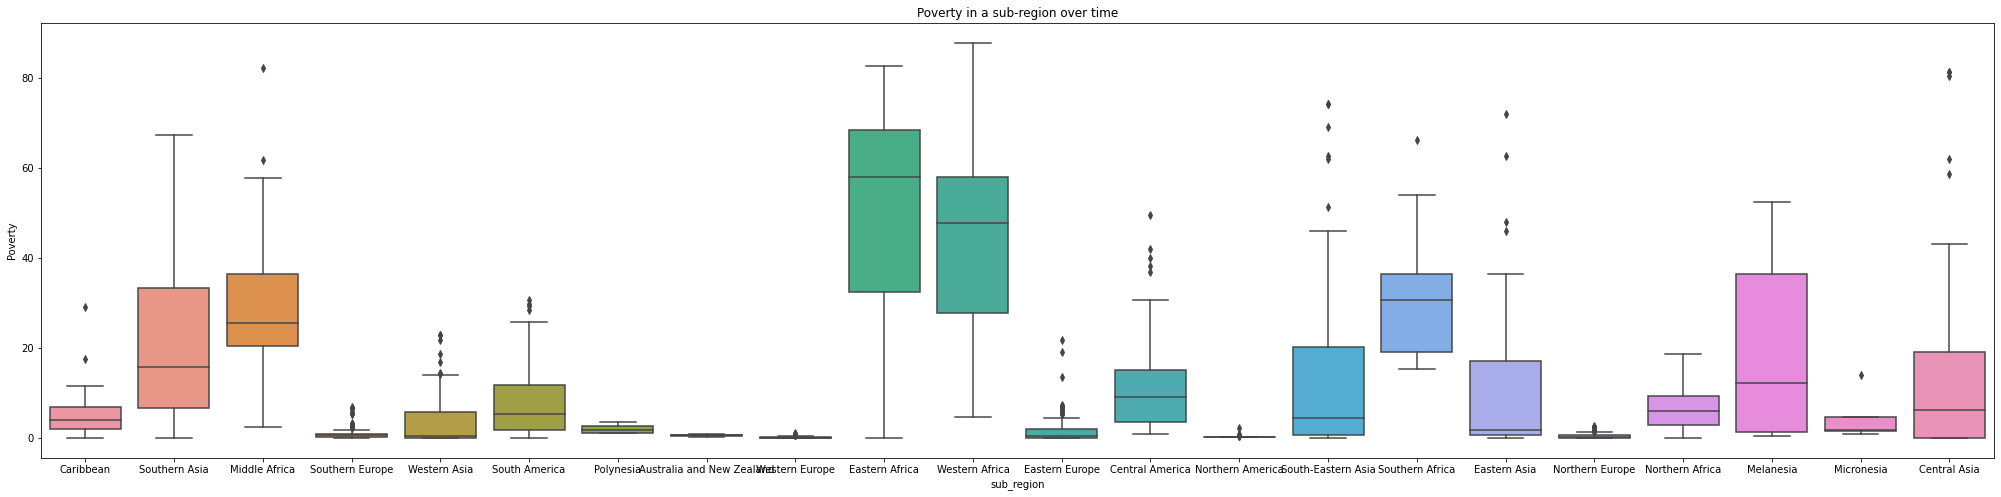

In [118]:
plt.figure(figsize=(35, 8))
sns.boxplot(x='sub_region', y='poverty_count', data=merged_df)
plt.xlabel("sub_region")
plt.ylabel("Poverty")
plt.title("Poverty in a sub-region over time")
plt.show()

<h5 style="color:green"> Answer </h5>

There is a consistent high poverty rate in Eastern and Western Africa as well as Southern Asia. There is a approximately no poverty rat recorded in Northern America and Australia and New Zealand. There has been a moderate average poverty rate in Western Asia. With this, analyzing these 6 diverse regions will make it easier to notice any patterns and relationships between foreign aid, GDP, and poverty levels. 

In [119]:
merged_df['poverty_count'].unique()

array([ nan, 21.4, 14.6, 31.1,  0.5,  1.1,  0.6,  0.2,  1. ,  0.1,  0.4,
        0. ,  0.3,  1.2,  1.7,  2. ,  1.9,  3.9,  4.2,  3.8,  4. ,  5. ,
        8.2, 12.4,  5.3,  2.6,  2.1,  1.6,  1.5,  0.7,  0.8, 11.9, 14. ,
       10. ,  7.5,  0.9,  1.4,  1.3,  6.2, 75.1, 79.4, 71.8, 65.1, 53.1,
       54.3, 50.7, 19.9, 82.1, 79.9, 54.7, 52.6, 39.6, 30.5, 37.3, 32.7,
       41.7, 41.9, 33.7, 33.3, 24. , 18.2, 13.5,  5.8,  1.8,  2.5,  2.3,
        3.4, 21.8, 19.2, 13.6,  6.6,  4.4,  3.5, 14.8, 20.9, 20.7, 19.6,
       23.9, 24.4, 30.6, 29.9, 25.8, 12.3, 22.4, 20.4, 23.3, 22.1, 14.7,
       16. , 14.3, 15. , 13. , 11.7, 12.6, 11.1,  8.3,  7.9,  6.5,  6.1,
        4.5,  3.7,  3.3,  4.7,  5.4, 13.4,  5.9, 41.8, 34.1, 29.1, 17.7,
       15.4, 82.2, 61.9,  2.2, 10.7,  6.7,  6.8,  4.6, 72. , 62.7, 48.1,
       46. , 36.5, 18. , 13.9, 10.2,  8.5,  2.9, 50.4, 25.7, 31.4,  9.6,
       17.6, 17.5, 21. , 14.2, 12. , 11. ,  4.9,  4.3,  9.4, 18.6, 10.6,
       25.9, 10.4,  9.9,  7. ,  7.1,  5.2,  6.9,  5

Considering that poverty_count has so many values to make it easier to analyse I will label each poverty value by one of the following 5 based on the value it has:

    * very low poverty = (0 - 10)
    * low poverty = (11 - 20)
    * moderate poverty = (21 - 30)
    * high poverty = (31 - 40)
    * very high poverty = above 40
    

In [129]:
# Define the labels for poverty rates
labels = ['very low poverty', 'low poverty', 'moderate poverty', 'high poverty', 'very high poverty']

# Define the bins for poverty rates
bins = [0, 10, 20, 30, 40, float('inf')]

# Use pandas cut function to bin the data and add a new column to the DataFrame
completed_df['poverty_level'] = pd.cut(completed_df['poverty_count'], bins=bins, labels=labels)
completed_df

,country_name,country_code_x,year,gdp,monetary_aid,EN.POP.SLUM.UR.ZS,SI.DST.02ND.20,SI.DST.03RD.20,SI.DST.04TH.20,SI.DST.05TH.20,...,SI.SPR.PCAP.ZG,code_2,code_3,country_code_y,iso_3166_2,continent,sub_region,region_code,sub_region_code,poverty_level
40,Aruba,ABW,2000,7.616589,1.150000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0,NaN
41,Aruba,ABW,2001,4.195963,-1.700000e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0,NaN
42,Aruba,ABW,2002,-0.957771,1.049000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0,NaN
43,Aruba,ABW,2003,1.120879,7.622000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0,NaN
44,Aruba,ABW,2004,7.281026,-1.132000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,AW,ABW,533,ISO 3166-2:AW,Americas,Caribbean,19.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,Zimbabwe,ZWE,2015,2.023650,7.882900e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0,NaN
11216,Zimbabwe,ZWE,2016,0.900955,6.542500e+08,22.75892,NaN,NaN,NaN,NaN,...,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0,NaN
11217,Zimbabwe,ZWE,2017,4.080264,7.258400e+08,NaN,9.1,13.2,20.6,51.1,...,-3.5,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0,high poverty
11218,Zimbabwe,ZWE,2018,5.009867,7.945600e+08,22.16356,NaN,NaN,NaN,NaN,...,NaN,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0,NaN


Since we understand that so much goes into how foreign aid is distributed which could affect the poverty rate and GDP growth, I will import the corruption distribution for every country to analyse the colleration of corruption along side the three attributes

In [132]:
corruption = pd.read_csv('../data/data_csv.csv')
# melt the corruption dataframe into long format
corruption_long = pd.melt(corruption, id_vars=['Jurisdiction'], var_name='year', value_name='corruption')

# rename the jurisdiction column to country_name
corruption_long = corruption_long.rename(columns={'Jurisdiction': 'country_name'})
corruption_long.head()
corruption_df = pd.merge(corruption_long, regions_df, left_on='country_name', right_on='country')
corruption_df['year'] = corruption_df['year'].astype(int)
corruption_df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [133]:
corruption_final = corruption_df[corruption_df['year']>=2000]

<h5 style="color:red"> Question 11 </h5>

Considering from the initial data analysis we noticed that regions like Eastern Africa, Western Africa, Western Asia, and Southern Asia have the highest foreign aid we will focus on these. We will also consider regions Northern America and Australia and New Zealand that had the least foreign aid in order to start noticing patterns. 

How does corruption, foreign aid, and poverty rate change over time in Western Africa from 2000 - 2019?

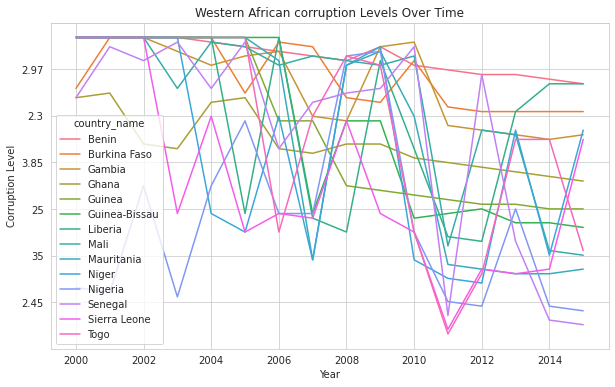

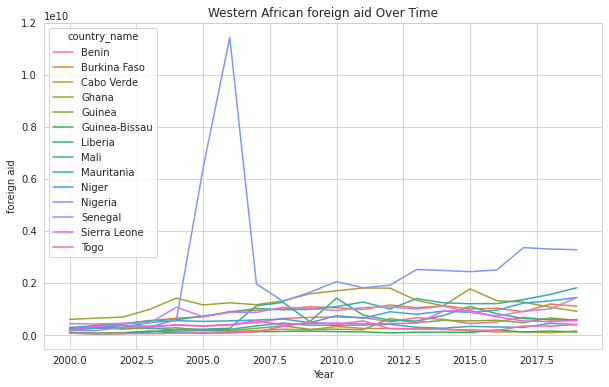

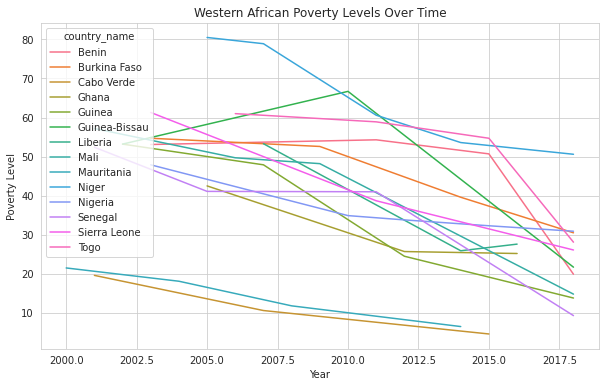

In [141]:
western_africa_df2 = corruption_final[corruption_final['sub_region'] == 'Western Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= western_africa_df2 )
plt.title('Western African corruption Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Corruption Level')

# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)

plt.show()

western_africa_df1 = completed_df[completed_df['sub_region'] == 'Western Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data=western_africa_df1)
plt.title('Western African foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('foreign aid')
plt.show()

western_africa_df = completed_df[completed_df['sub_region'] == 'Western Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
western_africa_df_filtered = western_africa_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data=western_africa_df_filtered)
plt.title('Western African Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Answer </h5>

Generally, poverty rates are decreasing and have nothing to do with corruption rates. While most of the countries in the region receive financial aid, the rate at which poverty decreases in each country does not seem to be directly correlated with the foreign aid received. This  goes to show that there is so much case by case context of each country that affect poverty rates. In Nigeria there is a spike in foreign aid that could be aid received to support the country due to The Yelwa massacre was a series of related incidents of religious violence between Muslims and Christians which took place in Yelwa, Nigeria between February and May 2004. These incidents killed over 700 people.

<h5 style="color:red"> Question 12 </h5>

How does corruption, foreign aid, and poverty rate change over time in Eastern Africa from 2000 - 2019?

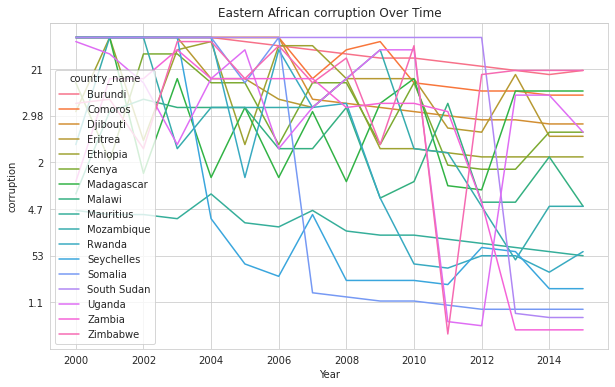

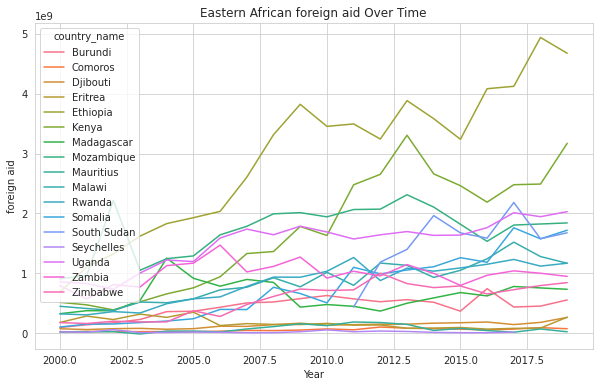

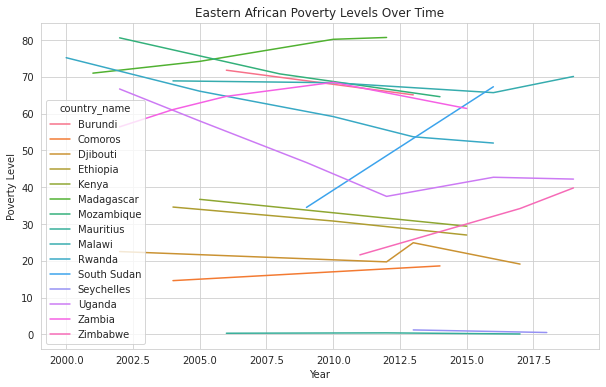

In [142]:
eastern_africa_df2 = corruption_final[corruption_final['sub_region'] == 'Eastern Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= eastern_africa_df2)
plt.title('Eastern African corruption Over Time')
plt.xlabel('Year')
plt.ylabel('corruption')
# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)
plt.show()

eastern_africa_df1 = completed_df[completed_df['sub_region'] == 'Eastern Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data= eastern_africa_df1)
plt.title('Eastern African foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('foreign aid')
plt.show()


eastern_africa_df = completed_df[completed_df['sub_region'] == 'Eastern Africa'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
eastern_africa_df_filtered = eastern_africa_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data= eastern_africa_df_filtered)
plt.title('Eastern African Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Answer </h5>

Generally, poverty rates are decreasing and have nothing to do with corruption rates. While most of the countries in the region receive financial aid, the rate at which poverty decreases in each country does not seem to be directly correlated with the foreign aid received. This  goes to show that there is so much case by case context of each country that affect poverty rates.

<h5 style="color:red"> Question 13 </h5>

How does corruption, foreign aid, and poverty rate change over time in Southern Asia from 2000 - 2019?

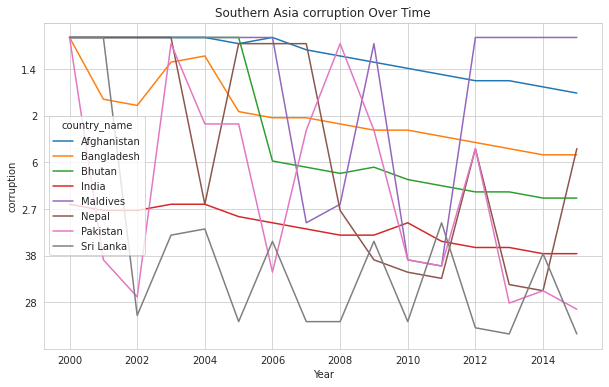

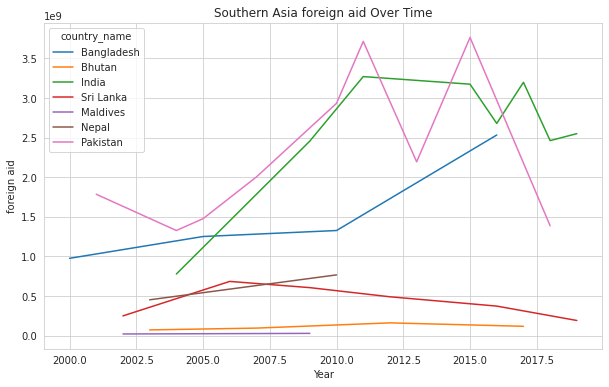

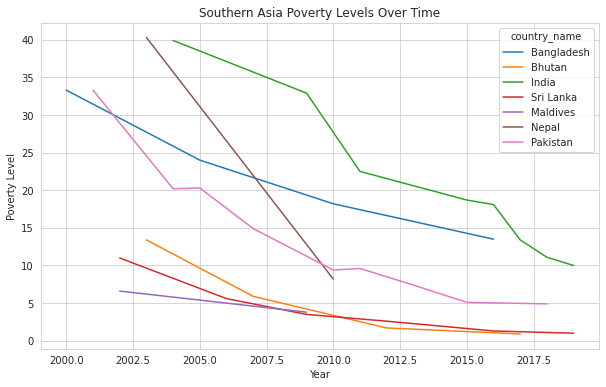

In [153]:
southern_asia_df2 = corruption_final[corruption_final['sub_region'] == 'Southern Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= southern_asia_df2 )
plt.title('Southern Asia corruption Over Time')
plt.xlabel('Year')
plt.ylabel('corruption')
# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)
plt.show()

southern_asia_df1 = completed_df[completed_df['sub_region'] == 'Southern Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
southern_asia_df_filtered1 = southern_asia_df1.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data= southern_asia_df_filtered1)
plt.title('Southern Asia foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('foreign aid')
plt.show()

southern_asia_df = completed_df[completed_df['sub_region'] == 'Southern Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
southern_asia_df_filtered = southern_asia_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data= southern_asia_df_filtered)
plt.title('Southern Asia Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Answer </h5>

Generally, poverty rates are decreasing and have nothing to do with corruption rates. While most of the countries in the region receive financial aid, the rate at which poverty decreases in each country does not seem to be directly correlated with the foreign aid received. This  goes to show that there is so much case by case context of each country that affect poverty rates.

<h5 style="color:red"> Question 14 </h5>

How does corruption, foreign aid, and poverty rate change over time in Western Asia from 2000 - 2019?

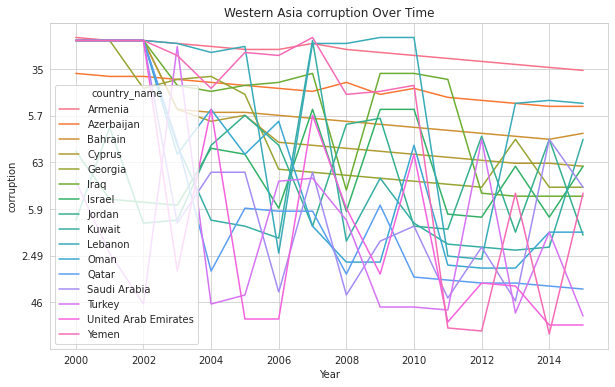

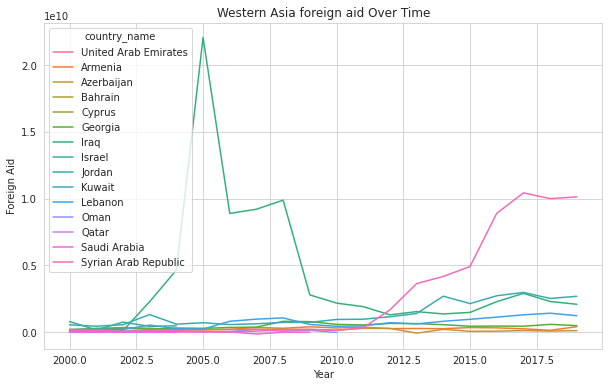

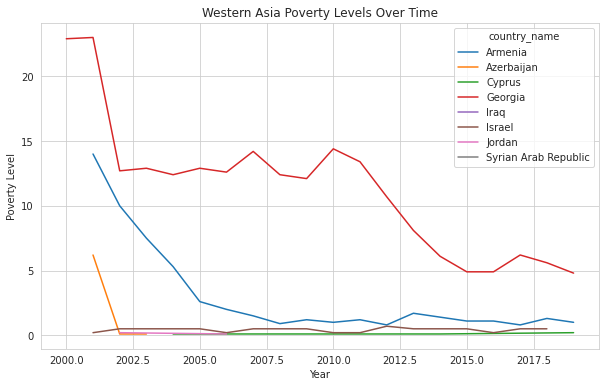

In [145]:
western_asia_df2 = corruption_final[corruption_final['sub_region'] == 'Western Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= western_asia_df2 )
plt.title('Western Asia corruption Over Time')
plt.xlabel('Year')
plt.ylabel('corruption')
# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)
plt.show()


western_asia_df1 = completed_df[completed_df['sub_region'] == 'Western Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data= western_asia_df1)
plt.title('Western Asia foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('Foreign Aid')
plt.show()

western_asia_df = completed_df[completed_df['sub_region'] == 'Western Asia'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
western_asia_df_filtered = western_asia_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data= western_asia_df_filtered)
plt.title('Western Asia Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Answer </h5>

Generally, poverty levels are decreasing especially in Georgia. Iraq which was the highest receiver of foreign aid in 2005 due to the Iraq war in 2005, nevertheless, there were no records of its poverty rates. We also see a similar increase in foreign aid in Syria starting in 2011, due to the wider 2011 Arab Spring protests. Nevertheless there are no corresponding decreases in poverty recorded. There seems to be no correlation between foreign aid and poverty rates.


<h5 style="color:red"> Question 15 </h5>

How does corruption, foreign aid, and poverty rate change over time in Northern America from 2000 - 2019?

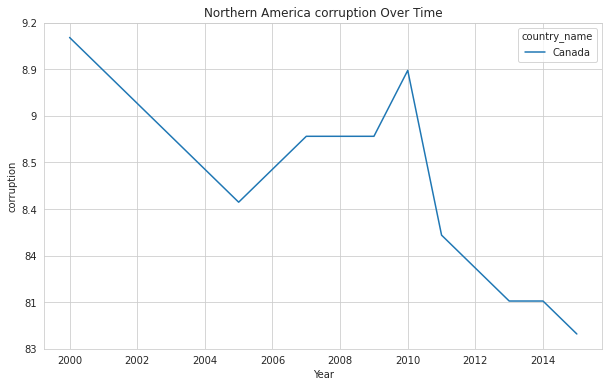

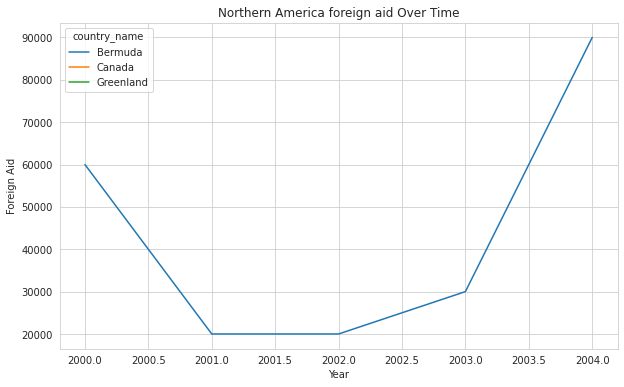

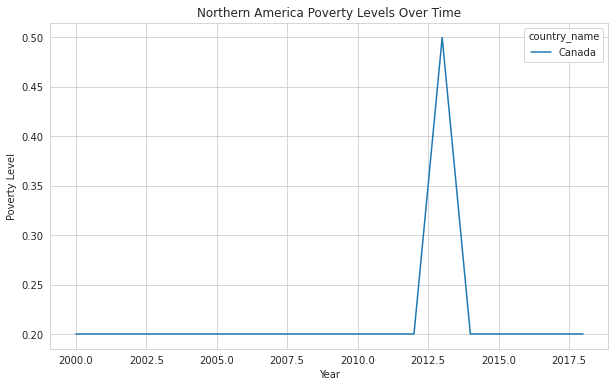

In [146]:
northern_america_df2 = corruption_final[corruption_final['sub_region'] == 'Northern America'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= northern_america_df2 )
plt.title('Northern America corruption Over Time')
plt.xlabel('Year')
plt.ylabel('corruption')
# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)
plt.show()


northern_america_df1 = completed_df[completed_df['sub_region']== 'Northern America'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data= northern_america_df1)
plt.title('Northern America foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('Foreign Aid')
plt.show()

northern_america_df = completed_df[completed_df['sub_region']== 'Northern America'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
northern_america_df_filtered = northern_america_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data= northern_america_df_filtered)
plt.title('Northern America Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Answer </h5>

 In Canada, there is a slight correlation between when corruption increased between 2009 - 2010, and when the poverty rate spiked right after between 2012 - 2014. Nevertheless, this might have a higher correlation with the dropping oil prices in Canada in 2014 than corruption. Furthermore, Canada has no foreign aid recorded and Bermuda has no corruption or poverty rate recorded.   

<h5 style="color:red"> Question 16 </h5>

How does corruption, foreign aid, and poverty rate change over time in Australia and New Zealand from 2000 - 2019?

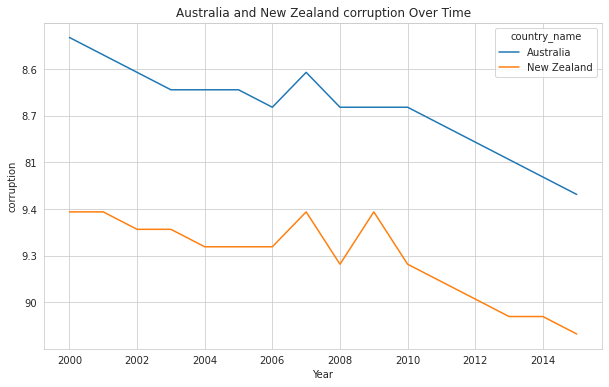

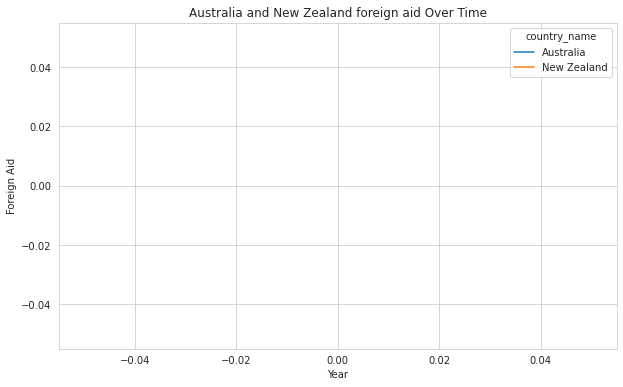

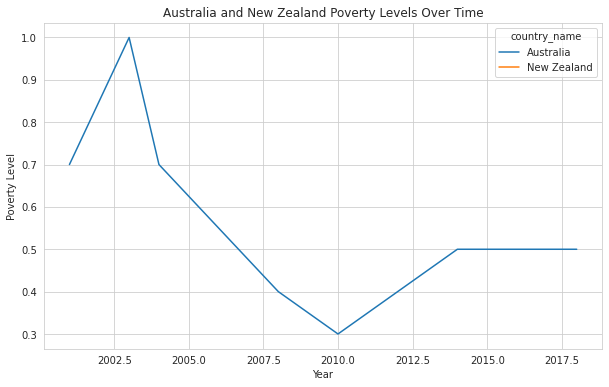

In [150]:
an_df2 = corruption_final[corruption_final['sub_region'] == 'Australia and New Zealand'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='corruption', hue='country_name', data= an_df2 )
plt.title('Australia and New Zealand corruption Over Time')
plt.xlabel('Year')
plt.ylabel('corruption')
# Set number of y-axis ticks to 8
num_ticks = 8
ymin, ymax = plt.ylim()
yticks = np.linspace(ymin, ymax, num_ticks)
plt.yticks(yticks)
plt.show()

an_df1 = completed_df[completed_df['sub_region']== 'Australia and New Zealand'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='monetary_aid', hue='country_name', data= an_df1)
plt.title('Australia and New Zealand foreign aid Over Time')
plt.xlabel('Year')
plt.ylabel('Foreign Aid')
plt.show()

an_df = completed_df[completed_df['sub_region']== 'Australia and New Zealand'] 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
an_df_filtered = an_df.dropna(subset=['poverty_level'])
sns.lineplot(x='year', y='poverty_count', hue='country_name', data= an_df)
plt.title('Australia and New Zealand Poverty Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Level')
plt.show()

<h5 style="color:green"> Conclusion </h5>

Australia floods of 2010–11, natural disaster that principally affected the three eastern states of Australia and was one of the worst in the country's history. This explains the poverty rate increase that starts from 2010, however, there is no correlation between this poverty  rate and corruption nor foreign aid since Australia doesn't even receive foreign aid.

<h4 style="color:red"> Conclusion </h4>

Generally places that received foreign aid showed slight decreases in poverty. Nevertheless, each country has its own unique graph which goes to show that there is so much goes into how the foreign aid is distributed based on the governance and needs of a country. With this, considering how other factors like political stability with in a country might affect its poverty rates, we have concluded that contrary to our hypothesis, foreign aid and development assistance  do not have stagnating impact on growth and poverty in regions receiving aid because we could not find any significant correlation besides the fact that regions with high poverty rates like Eastern Africa tend to receive more foreign aid. 
We also did not notice any direct correlation between foreign aid, GDP, Poverty, and corruption. This was contrary to our perspective since we though that perhaps we would notice a pattern in places with high foreign aid and high poverty in places with high corruption.